# Machine Learning Modeling Using Principal Component Analysis (PCA) 

In [1]:
%%capture
%matplotlib inline
import pycaret
from sklearn.model_selection import train_test_split
from EDA_Optimized import *
from pycaret.classification import *
from sklearn.decomposition import PCA

#### Decomposing into components

In [2]:
class_ = ds["class"] # Extract the target variable 'class' from the dataset
X = ds.drop("class", axis=1) # Drop the 'class' column from the dataset to create the feature matrix
n_components = 2 # Define the number of principal components to retain
pca = PCA(n_components=n_components) # Initialize the PCA object with the specified number of components



#### Fit and trandform the data using PCA

In [3]:
X_pca = pca.fit_transform(X)

#### Create a DataFrame with the transformed data

In [4]:
pca_ds = pd.DataFrame(
    data=X_pca, columns=[f"PC{i+1}" for i in range(n_components)]
)
pca_ds["class"] = class_
pca_ds.head()

,PC1,PC2,class
0,-68.690522,-9.108052,1
1,-37.982435,36.961967,1
2,-52.802149,-0.135064,1
3,-39.516957,-50.538726,1
4,111.569392,-34.048538,1


In [5]:
s = setup(data=pca_ds, target='class', session_id=123, normalize=True)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Binary
3,Original data shape,"(155, 3)"
4,Transformed data shape,"(155, 3)"
5,Transformed train set shape,"(108, 3)"
6,Transformed test set shape,"(47, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [6]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7964,0.6806,0.9778,0.8091,0.8841,0.0966,0.1043,0.3360
lda,Linear Discriminant Analysis,0.7964,0.6861,0.9778,0.8091,0.8841,0.0966,0.1043,0.0090
dummy,Dummy Classifier,0.7964,0.5000,1.0000,0.7964,0.8862,0.0000,0.0000,0.0080
nb,Naive Bayes,0.7882,0.6438,0.9667,0.8087,0.8787,0.0728,0.0757,0.0080
qda,Quadratic Discriminant Analysis,0.7791,0.6757,0.9556,0.8069,0.8729,0.0590,0.0608,0.0100
ridge,Ridge Classifier,0.7782,0.6861,0.9778,0.7927,0.8746,-0.0276,-0.0298,0.0090
rf,Random Forest Classifier,0.7691,0.6392,0.9097,0.8195,0.8587,0.1623,0.1805,0.0430
lightgbm,Light Gradient Boosting Machine,0.7691,0.6535,0.9431,0.8046,0.8664,0.0437,0.0442,0.1540
et,Extra Trees Classifier,0.7509,0.6476,0.8875,0.8155,0.8465,0.1401,0.1583,0.0390
ada,Ada Boost Classifier,0.7318,0.5604,0.8986,0.7915,0.8378,0.0070,0.0144,0.0310


## Evaluate the best model

In [7]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Plot various aspects of the best model

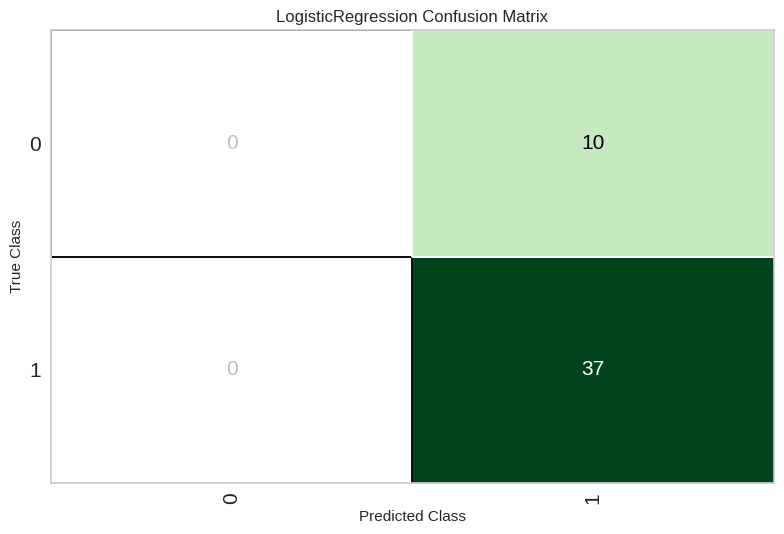

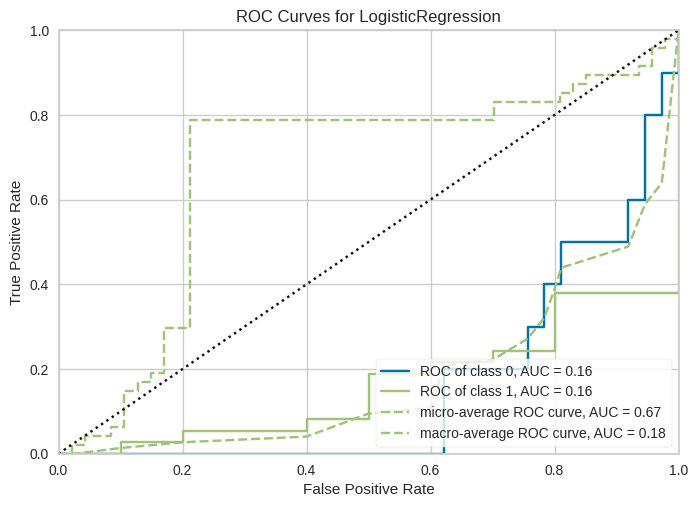

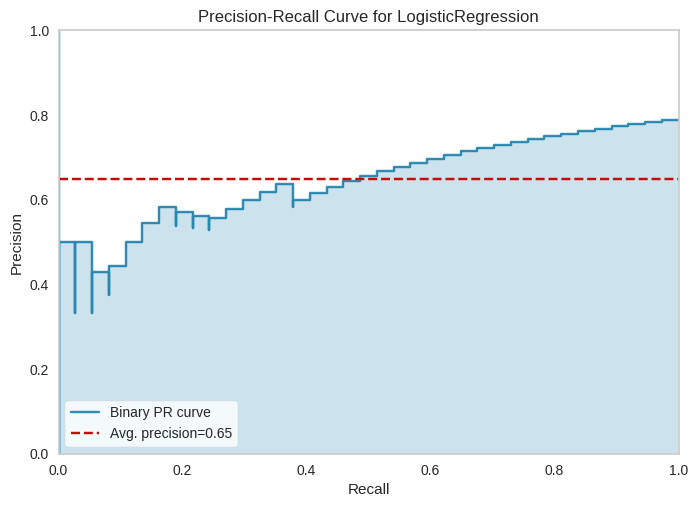

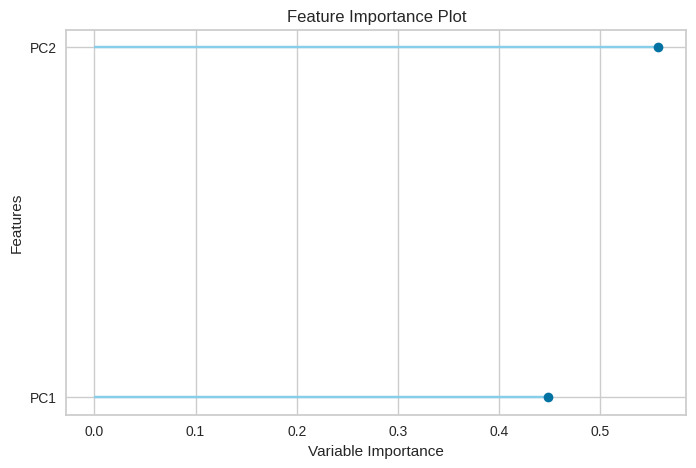

In [8]:
plot_model(best_model, plot='confusion_matrix')
plot_model(best_model, plot='auc')
plot_model(best_model, plot='pr')
plot_model(best_model, plot='feature')

### Making Predictions

In [9]:
predictions = predict_model(best_model)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7872,0.1622,1.0000,0.7872,0.8810,0.0000,0.0000


,PC1,PC2,class,prediction_label,prediction_score
122,-46.765934,-12.110934,1,1,0.8040
44,-1.311981,-18.426281,1,1,0.8481
112,-56.554646,-10.733547,1,1,0.7933
75,-44.343910,-38.631256,1,1,0.8496
150,155.158676,-35.472729,0,1,0.9387


### Displaying the probability of both classes

In [10]:
predictions_prob = predict_model(best_model, raw_score=True)
predictions_prob.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7872,0.1622,1.0000,0.7872,0.8810,0.0000,0.0000


,PC1,PC2,class,prediction_label,prediction_score_0,prediction_score_1
122,-46.765934,-12.110934,1,1,0.1960,0.8040
44,-1.311981,-18.426281,1,1,0.1519,0.8481
112,-56.554646,-10.733547,1,1,0.2067,0.7933
75,-44.343910,-38.631256,1,1,0.1504,0.8496
150,155.158676,-35.472729,0,1,0.0613,0.9387


### Save the best model

In [11]:
save_model(best_model, "smote_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['PC1', 'PC2'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(ad...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=StandardScaler(copy=True,
                                       